In [1]:
import numpy as np
import sys
import os
# sys.path.append('.conda/envs/shear/lib/python3.9/site-packages/')
import astropy.io.fits as pf
import matplotlib.pylab as mplot
%pylab inline
import fitsio
import h5py

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'fitsio'

In [2]:
metadata = np.genfromtxt('../Tilelist_DR3_1_1.csv', dtype='str', delimiter=",")[1:]
# print(metadata)

In [8]:
test_tile = metadata[1][0]
test_fits = fitsio.FITS(shear_dir+'metacal_output_'+test_tile+'.fits')
print(pf.open(shear_dir+'metacal_output_'+test_tile+'.fits')[1].header.keys)

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 5956 / width of table in bytes                        
NAXIS2  =                37039 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   78 / number of fields in each row                   
TTYPE1  = 'id      '           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'x       '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            

In [ ]:
# print(pf.open(shear_dir+'metacal_output_'+test_tile+'.fits')[1].data[''])

In [ ]:
# Columns = ['dec', 'good_frac', 'id', 
#            'mcal_T_1m', 'mcal_T_1p', 'mcal_T_2m', 'mcal_T_2p', 'mcal_T_err_1m',
#            'mcal_T_err_1p', 'mcal_T_err_2m', 'mcal_T_err_2p', 'mcal_T_err_noshear',
#            'mcal_T_noshear', 'mcal_T_ratio_1m', 'mcal_T_ratio_1p', 'mcal_T_ratio_2m',
#            'mcal_T_ratio_2p', 'mcal_T_ratio_noshear', 'mcal_flags', 'mcal_flux_1m', 'mcal_flux_1p',
#            'mcal_flux_2m', 'mcal_flux_2p', 'mcal_flux_cov_1m', 'mcal_flux_cov_1p', 'mcal_flux_cov_2m',
#            'mcal_flux_cov_2p', 'mcal_flux_cov_noshear', 'mcal_flux_err_1m', 'mcal_flux_err_1p',
#            'mcal_flux_err_2m', 'mcal_flux_err_2p', 'mcal_flux_err_noshear', 'mcal_flux_noshear',
#            'mcal_g_1m', 'mcal_g_1p', 'mcal_g_2m', 'mcal_g_2p', 'mcal_g_cov_1m', 'mcal_g_cov_1p',
#            'mcal_g_cov_2m', 'mcal_g_cov_2p', 'mcal_g_cov_noshear', 'mcal_g_noshear', 'mcal_nfev_1m',
#            'mcal_nfev_1p', 'mcal_nfev_2m', 'mcal_nfev_2p', 'mcal_nfev_noshear', 'mcal_pars_1m',
#            'mcal_pars_1p', 'mcal_pars_2m', 'mcal_pars_2p', 'mcal_pars_cov_1m', 'mcal_pars_cov_1p',
#            'mcal_pars_cov_2m', 'mcal_pars_cov_2p', 'mcal_pars_cov_noshear', 'mcal_pars_noshear',
#            'mcal_psf_T_noshear', 'mcal_psf_g_noshear', 'mcal_s2n_1m', 'mcal_s2n_1p', 'mcal_s2n_2m',
#            'mcal_s2n_2p', 'mcal_s2n_noshear', 'mcal_s2n_r_1m', 'mcal_s2n_r_1p', 'mcal_s2n_r_2m',
#            'mcal_s2n_r_2p', 'mcal_s2n_r_noshear', 'ra', 'x', 'y', 
#            'Ncutouts_raw', 'expnum', 'ccdnum', 'x_exp', 'y_exp']

Columns = ['dec', 'badfrac', 'id', 
           'mcal_T_1m', 'mcal_T_1p', 'mcal_T_2m', 'mcal_T_2p', 
           'mcal_T_noshear', 'mcal_T_ratio_1m', 'mcal_T_ratio_1p', 'mcal_T_ratio_2m',
           'mcal_T_ratio_2p', 'mcal_T_ratio_noshear', 'mcal_flags', 'mcal_flux_1m', 'mcal_flux_1p',
           'mcal_flux_2m', 'mcal_flux_2p', 'mcal_flux_err_1m', 'mcal_flux_err_1p',
           'mcal_flux_err_2m', 'mcal_flux_err_2p', 'mcal_flux_err_noshear', 'mcal_flux_noshear',
           'mcal_g_1m', 'mcal_g_1p', 'mcal_g_2m', 'mcal_g_2p', 'mcal_g_cov_1m', 'mcal_g_cov_1p',
           'mcal_g_cov_2m', 'mcal_g_cov_2p', 'mcal_g_cov_noshear', 'mcal_g_noshear', 
           'mcal_psf_T_noshear', 'mcal_psf_g_noshear', 'mcal_s2n_1m', 'mcal_s2n_1p', 'mcal_s2n_2m',
           'mcal_s2n_2p', 'mcal_s2n_noshear', 'ra', 'x', 'y', 
           'Ncutouts_raw', 'ccdnum', 'x_exp', 'y_exp']


# Columns = ['mcal_s2n_r_2p']


shear_dir = '/project/chihway/data/decade/shearcat_v2/'
coadd_dir = '/project2/chihway/data/decade/coaddcat_v2/'

path = '/scratch/midway3/chihway/metacal_test_20230323.hdf'

with h5py.File(path, "w") as f:

    #Create all columns you need
    test_tile = metadata[1][0]
    test_fits = fitsio.FITS(shear_dir+'metacal_output_'+test_tile+'.fits')
    
    for col in Columns:
        if col!='ra' and col!='dec':
            Ndim = len(test_fits[1].read(vstorage='object')[col].shape)
            if Ndim==1:
                type_col = str(type(test_fits[1].read(vstorage='object')[col][0])).replace('class', '').replace("< '", "").replace("'>", "").replace("numpy.", "")
                f.create_dataset(col, data = [], chunks=(10**4,), maxshape = (None,), dtype=type_col)
            if Ndim==2:
                type_col = str(type(test_fits[1].read(vstorage='object')[col][0][0])).replace('class', '').replace("< '", "").replace("'>", "").replace("numpy.", "")
                f.create_dataset(col, data = [[]], chunks=((10**4,20)), maxshape = (None,20), dtype=type_col)
            if Ndim==3:
                type_col = str(type(test_fits[1].read(vstorage='object')[col][0][0][0])).replace('class', '').replace("< '", "").replace("'>", "").replace("numpy.", "")
                f.create_dataset(col, data = [[[]]], chunks=((10**4,20,20)), maxshape = (None,20,20), dtype=type_col)

    f.create_dataset('ra', data = [], chunks=(10**4,), maxshape = (None,))            
    f.create_dataset('dec', data = [], chunks=(10**4,), maxshape = (None,))            

    # Appends new_data array into existing dataset
    def add_data(dataset, new_data):

        if len(new_data.shape)==1:
            dataset.resize(dataset.shape[0] + len(new_data), axis=0)
            dataset[-len(new_data):] = new_data

        if len(new_data.shape)==2:
            if dataset.shape[0]==1:
                dataset.resize((dataset.shape[0] + len(new_data)-1,new_data.shape[1]))
            else:
                dataset.resize((dataset.shape[0] + len(new_data),new_data.shape[1]))
            dataset[-len(new_data):] = new_data

        if len(new_data.shape)==3:
            if dataset.shape[0]==1:
                dataset.resize((dataset.shape[0] + len(new_data)-1,new_data.shape[1],new_data.shape[2]))
            else:
                dataset.resize((dataset.shape[0] + len(new_data),new_data.shape[1],new_data.shape[2]))
            dataset[-len(new_data):] = new_data


    for i in range(6537):
        tile = metadata[i][0]
        print(tile)

        if os.path.exists(shear_dir+'metacal_output_'+tile+'.fits') and os.path.exists(coadd_dir+'gold_mask_'+tile+'.npz'):
            fits = fitsio.FITS(shear_dir+'metacal_output_'+tile+'.fits')
 
            shear_cat = fits[1].read(vstorage='object')
            # metacal output files, it has an ID that is the correct coadd IDs, but already 
            # with a cut that only includes objects that have a metacal measurement

            shear_id = np.load(shear_dir+'ids_match_'+tile+'.npz', allow_pickle=True)
            # ad hoc file we save when running metacal, the full list of coadd IDs for all objects in the MEDS file
            # these are row-by-row matched to the catalog files that contain e.g. photometry

            gold_mask = np.load(coadd_dir+'gold_mask_'+tile+'.npz', allow_pickle=True)
            gold_mask_full = gold_mask['maskSE']*gold_mask['maskIMA']*(gold_mask['maskSG']>=2) 
            # from the catalog files, we make the gold cut
            # still using rough star/galaxy separation

            shear_id_masked_gold = shear_id['ids'][gold_mask_full]
            # this is IDs of all the objects that pass the gold cut

            mask_joint = np.in1d(shear_cat['id'], shear_id_masked_gold)
            # mask to apply on the metacal catalog, to remove objects that don't pass the gold cut

            mask_joint_invert = np.in1d(shear_id_masked_gold, shear_cat['id'][mask_joint])
            # invert mask to apply to the original tile catalog, to selecout the final objects

            ra = gold_mask['ra'][gold_mask_full][mask_joint_invert]
            dec = gold_mask['dec'][gold_mask_full][mask_joint_invert]
            add_data(f['ra'], ra)
            add_data(f['dec'], dec)
            
            for col2 in Columns:
                if col2!='ra' and col2!='dec':
                    data2 = shear_cat[col2][mask_joint]
                    add_data(f[col2], data2)
                    if col2=='id':
                        print(i, len(f[col2]))

        else:
            print('tile missing '+tile)



DES0934-0207
tile missing DES0934-0207
DES1011-0915
1 17720
DES1006-1915
2 32258
DES0845+0209
3 50320
DES1157-1124
4 71452
DES1143-0958
5 95265
DES0756+2625
6 111169
DES0700+2834
7 121605
DES0936-0624
8 140321
DES0849+2500
9 158301
DES1111+2917
10 173441
DES1017-0207
11 204216
DES0856+1209
12 221579
DES1010+0043
13 246518
DES0910+0626
14 262814
DES1026-2124
15 279456
DES0901+1500
16 298443
DES0938-1041
17 314752
DES1122-1915
18 333844
DES0810+0917
19 351301
DES1040-1707
20 370042
DES1051+0500
21 383939
DES0948+2043
22 402200
DES1047-1458
23 422891
DES1047+1417
24 433755
DES1015+0335
25 454049
DES0824-0416
26 467619
DES0831+1626
27 484542
DES1016-2124
28 501665
DES0918+1000
29 519109
DES1053-1041
30 542681
DES0910-1707
31 555959
DES1037-0458
32 573761
DES0949+0335
33 588642
DES0851+1126
34 611158
DES0747+1126
35 630277
DES0804-0915
36 643511
DES0920+2334
37 657351
DES0942+1626
38 670594
DES0705+2500
39 685119
DES0653+2251
40 690613
DES1014-1458
41 709976
DES1113-1415
42 728779
DES1116+1

In [ ]:
with h5py.File('/scratch/midway3/chihway/metacal_test_20230320.hdf', 'r') as f:
    for tag in Columns:
        print(tag, f[tag][:].shape)
#     print(f['mcal_s2n_r_1m'][10000:])

dec (16932519,)
badfrac (16932519,)
id (16932519,)
mcal_T_1m (16932519,)
mcal_T_1p (16932519,)
mcal_T_2m (16932519,)
mcal_T_2p (16932519,)
mcal_T_noshear (16932519,)
mcal_T_ratio_1m (16932519,)
mcal_T_ratio_1p (16932519,)
mcal_T_ratio_2m (16932519,)
mcal_T_ratio_2p (16932519,)
mcal_T_ratio_noshear (16932519,)
mcal_flags (16932519,)
mcal_flux_1m (16932519, 3)
mcal_flux_1p (16932519, 3)
mcal_flux_2m (16932519, 3)
mcal_flux_2p (16932519, 3)
mcal_flux_err_1m (16932519, 3)
mcal_flux_err_1p (16932519, 3)
mcal_flux_err_2m (16932519, 3)
mcal_flux_err_2p (16932519, 3)
mcal_flux_err_noshear (16932519, 3)
mcal_flux_noshear (16932519, 3)
mcal_g_1m (16932519, 2)
mcal_g_1p (16932519, 2)
mcal_g_2m (16932519, 2)
mcal_g_2p (16932519, 2)


In [41]:
with h5py.File('/scratch/midway3/chihway/metacal_test_20230320.hdf', 'r') as f:
    print('x_exp', f['x_exp'][:])

x_exp [[[  224.37554602 -9999.         -9999.         ... -9999.
   -9999.         -9999.        ]
  [  283.2909215   1683.62452074 -9999.         ... -9999.
   -9999.         -9999.        ]
  [  238.74973027   234.67153566 -9999.         ... -9999.
   -9999.         -9999.        ]]

 [[ 1784.68902996   388.05117875 -9999.         ... -9999.
   -9999.         -9999.        ]
  [ 1697.29397292   326.31278008  1680.82275175 ... -9999.
   -9999.         -9999.        ]
  [  337.02979583 -9999.         -9999.         ... -9999.
   -9999.         -9999.        ]]

 [[ 1787.22114665   383.67781186 -9999.         ... -9999.
   -9999.         -9999.        ]
  [ 1679.91605085 -9999.         -9999.         ... -9999.
   -9999.         -9999.        ]
  [  332.59219666  1723.5224675  -9999.         ... -9999.
   -9999.         -9999.        ]]

 ...

 [[ 1177.28905484  1955.74224666   290.46994129 ... -9999.
   -9999.         -9999.        ]
  [ 1266.51672029   263.89501232  1962.52732367 ... 

In [43]:
with h5py.File('/scratch/midway3/chihway/metacal_test_20230320.hdf', 'r') as f:
    print(len(f['ra'][:]))
    ra = f['ra'][:]
    dec = f['dec'][:]
    s2n = f['mcal_s2n_noshear'][:]
    T = f['mcal_T_ratio_noshear'][:]
    g = f['mcal_g_noshear'][:]
    print(g.shape)
    print(T.shape)
    mask = (T>0.5)*(s2n>10)
    print(len(ra[mask]), len(ra[mask])*1.0/(0.5*60*60*95))

71452
(71452, 2)
(71452,)
36601 0.21404093567251462


(array([2.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 7.000e+00, 9.000e+00, 1.500e+01, 1.500e+01, 1.400e+01,
        3.300e+01, 3.100e+01, 3.700e+01, 3.600e+01, 3.700e+01, 5.700e+01,
        6.200e+01, 8.500e+01, 8.400e+01, 9.200e+01, 1.260e+02, 1.320e+02,
        1.570e+02, 1.810e+02, 1.910e+02, 2.490e+02, 2.350e+02, 2.660e+02,
        3.080e+02, 4.160e+02, 3.990e+02, 4.540e+02, 5.090e+02, 6.500e+02,
        6.250e+02, 6.950e+02, 7.840e+02, 8.270e+02, 9.270e+02, 9.860e+02,
        1.093e+03, 1.171e+03, 1.250e+03, 1.371e+03, 1.372e+03, 1.440e+03,
        1.420e+03, 1.413e+03, 1.390e+03, 1.326e+03, 1.204e+03, 1.223e+03,
        1.078e+03, 1.015e+03, 9.370e+02, 8.900e+02, 7.680e+02, 7.290e+02,
        6.460e+02, 5.790e+02, 5.320e+02, 4.930e+02, 4.180e+02, 3.970e+02,
        3.670e+02, 3.010e+02, 2.720e+02, 2.620e+02, 2.070e+02, 1.790e+02,
        1.590e+02, 1.410e+02, 1.320e+02, 9.300e+01, 1.080e+02, 8.800e+01,
        7.300e+01, 5.500e+01, 4.600e+0

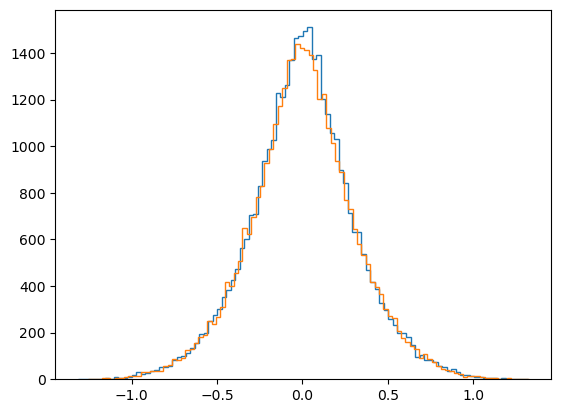

In [44]:
mplot.hist(g[:,0][mask]/0.62, bins=100, histtype='step')
mplot.hist(g[:,1][mask]/0.62, bins=100, histtype='step')

In [7]:
len(mask)

1634213

In [8]:
import healpy as hp

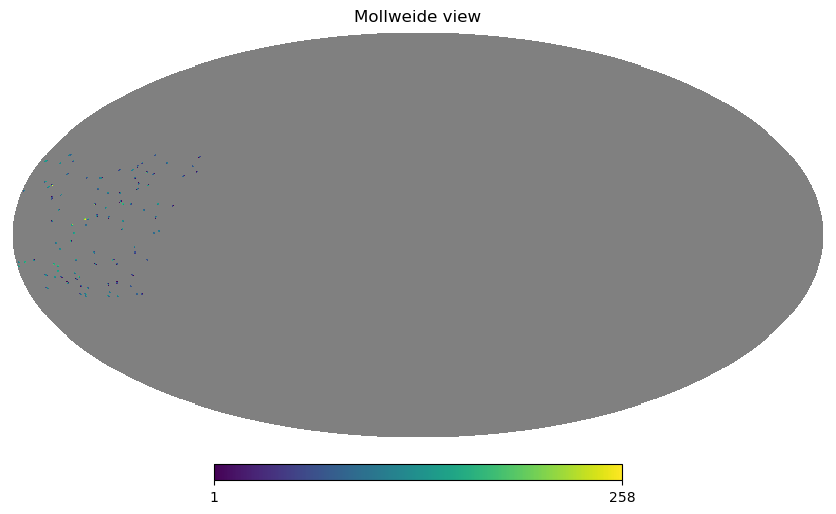

In [9]:
nside = 1024
theta = (90.-dec)/180*np.pi
phi = ra/180*np.pi
pix = hp.ang2pix(nside, theta, phi)
map_shearcat = np.zeros(hp.nside2npix(nside))
for i in range(len(pix)):
    map_shearcat[pix[i]] += 1
    
map_shearcat[map_shearcat==0] = hp.UNSEEN
hp.mollview(map_shearcat)

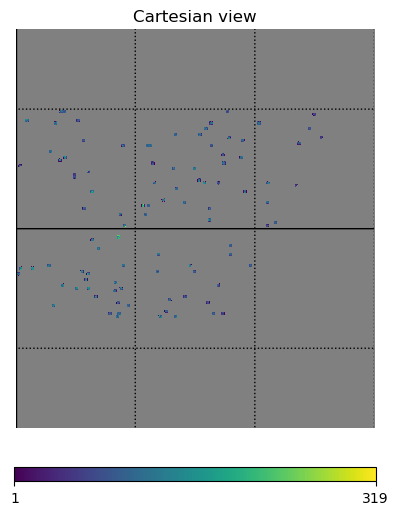

In [10]:
hp.cartview(map_shearcat, lonra=[90,180], latra=[-50,50])
hp.graticule()